In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Diabetes ##

In [2]:
df=pd.read_csv(r'diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

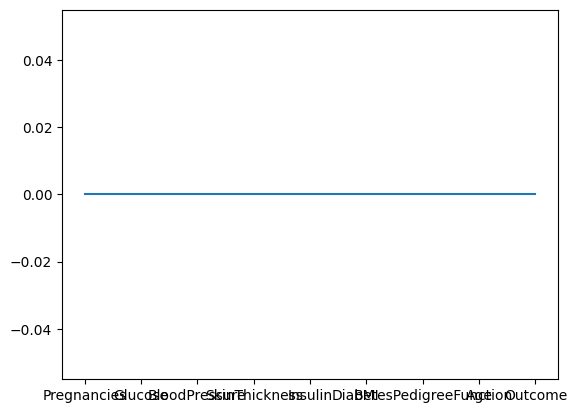

In [5]:
sns.lineplot(df.isnull().sum())

<Axes: xlabel='Outcome', ylabel='count'>

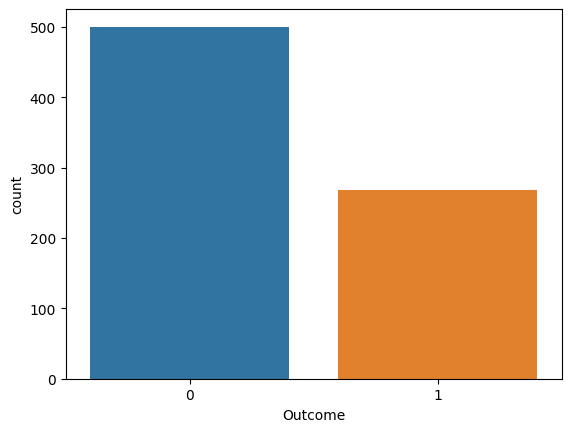

In [6]:
sns.countplot(x='Outcome',data=df)

In [7]:
df.isnull().sum().sum()

0

In [8]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
x=df.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [10]:
y=df['Outcome']
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95,60,18,58,23.9,0.260,22
139,5,105,72,29,325,36.9,0.159,28
485,0,135,68,42,250,42.3,0.365,24
547,4,131,68,21,166,33.1,0.160,28
18,1,103,30,38,83,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,0,0,22.4,0.207,27
270,10,101,86,37,0,45.6,1.136,38
435,0,141,0,0,0,42.4,0.205,29


In [13]:
y_train

334    0
139    0
485    1
547    0
18     0
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 537, dtype: int64

In [14]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,98,58,33,190,34.0,0.430,43
324,2,112,75,32,0,35.7,0.148,21
624,2,108,64,0,0,30.8,0.158,21
690,8,107,80,0,0,24.6,0.856,34
473,7,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...,...
619,0,119,0,0,0,32.4,0.141,24
198,4,109,64,44,99,34.8,0.905,26
538,0,127,80,37,210,36.3,0.804,23
329,6,105,70,32,68,30.8,0.122,37


In [15]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
619    1
198    1
538    0
329    0
302    0
Name: Outcome, Length: 231, dtype: int64

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 5)
dts.fit(x_train,y_train)
y_pred=dts.predict(x_test)
acc_dts=accuracy_score(y_pred,y_test)
acc_dts

0.7705627705627706

In [17]:
import pickle
with open('DecisionTreeClassifier(diabetes).pkl', 'wb') as fp:
    pickle.dump(dts, fp)

In [18]:
with open('DecisionTreeClassifier(diabetes).pkl', 'rb') as fp:
    model = pickle.load(fp)

In [19]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       168
           1       0.56      0.71      0.63        63

    accuracy                           0.77       231
   macro avg       0.72      0.75      0.73       231
weighted avg       0.79      0.77      0.78       231



In [20]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(random_state=52,n_estimators = 50 )
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
acc_adb=accuracy_score(y_pred,y_test)
acc_adb

0.7445887445887446

In [21]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       152
           1       0.62      0.63      0.63        79

    accuracy                           0.74       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.74      0.74       231



In [22]:
import xgboost as xgb
xgs = xgb.XGBClassifier()
xgs.fit(x_train,y_train)
y_pred=xgs.predict(x_test)
acc_xgs=accuracy_score(y_pred,y_test)
acc_xgs

0.7272727272727273

In [23]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       144
           1       0.65      0.60      0.62        87

    accuracy                           0.73       231
   macro avg       0.71      0.70      0.70       231
weighted avg       0.72      0.73      0.72       231



In [24]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(iterations=500, depth=6, learning_rate=0.1)
catboost_model.fit(x_train, y_train)
y_pred_catboost = catboost_model.predict(x_test)
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy with CatBoost:", acc_catboost)

0:	learn: 0.6326676	total: 169ms	remaining: 1m 24s
1:	learn: 0.5982969	total: 181ms	remaining: 45.1s
2:	learn: 0.5686640	total: 191ms	remaining: 31.7s
3:	learn: 0.5378063	total: 196ms	remaining: 24.3s
4:	learn: 0.5143858	total: 200ms	remaining: 19.8s
5:	learn: 0.4912764	total: 206ms	remaining: 17s
6:	learn: 0.4701889	total: 209ms	remaining: 14.7s
7:	learn: 0.4553765	total: 212ms	remaining: 13.1s
8:	learn: 0.4411082	total: 215ms	remaining: 11.7s
9:	learn: 0.4322133	total: 223ms	remaining: 10.9s
10:	learn: 0.4202205	total: 226ms	remaining: 10s
11:	learn: 0.4124830	total: 228ms	remaining: 9.28s
12:	learn: 0.4039663	total: 231ms	remaining: 8.64s
13:	learn: 0.3982691	total: 233ms	remaining: 8.1s
14:	learn: 0.3885476	total: 237ms	remaining: 7.65s
15:	learn: 0.3796994	total: 239ms	remaining: 7.23s
16:	learn: 0.3727551	total: 241ms	remaining: 6.86s
17:	learn: 0.3687779	total: 244ms	remaining: 6.53s
18:	learn: 0.3646168	total: 246ms	remaining: 6.24s
19:	learn: 0.3600789	total: 249ms	remaining: 

In [25]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
base_classifiers = [
    ('decision_tree', DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)),
    ('adaboost', AdaBoostClassifier(random_state=52, n_estimators=50))
]
meta_classifier = DecisionTreeClassifier()
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier
)
stacking_classifier.fit(x_train, y_train)
y_pred_stacking = stacking_classifier.predict(x_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy with Stacking Classifier:", acc_stacking)

Accuracy with Stacking Classifier: 0.6536796536796536


In [26]:
abc=[1,	95,	60,	18,	58,	23.9,	0.260,	22]
result=model.predict([abc])
result=result[0]
if result==0:
    print('The Person has NO-Diabetes')
else:
    print('The Person has Diabetes')

The Person has NO-Diabetes


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [27]:
abc=[10,	101,	86,	37,	0,	45.6,	1.136,	38]
result=model.predict([abc])
result=result[0]
if result==0:
    print('The Person has NO-Diabetes')
else:
    print('The Person has Diabetes')

The Person has Diabetes


c:\Program Files\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Liver ##

In [28]:
import pandas as pd

In [29]:
df2=pd.read_csv('indian_liver_patient.csv')
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [30]:
df2.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [31]:
df2.shape

(583, 11)

In [32]:
df2.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [33]:
df2.isnull().sum().sum()

4

In [34]:
df2 = df2.dropna()

In [35]:
df2.isnull().sum().sum()

0

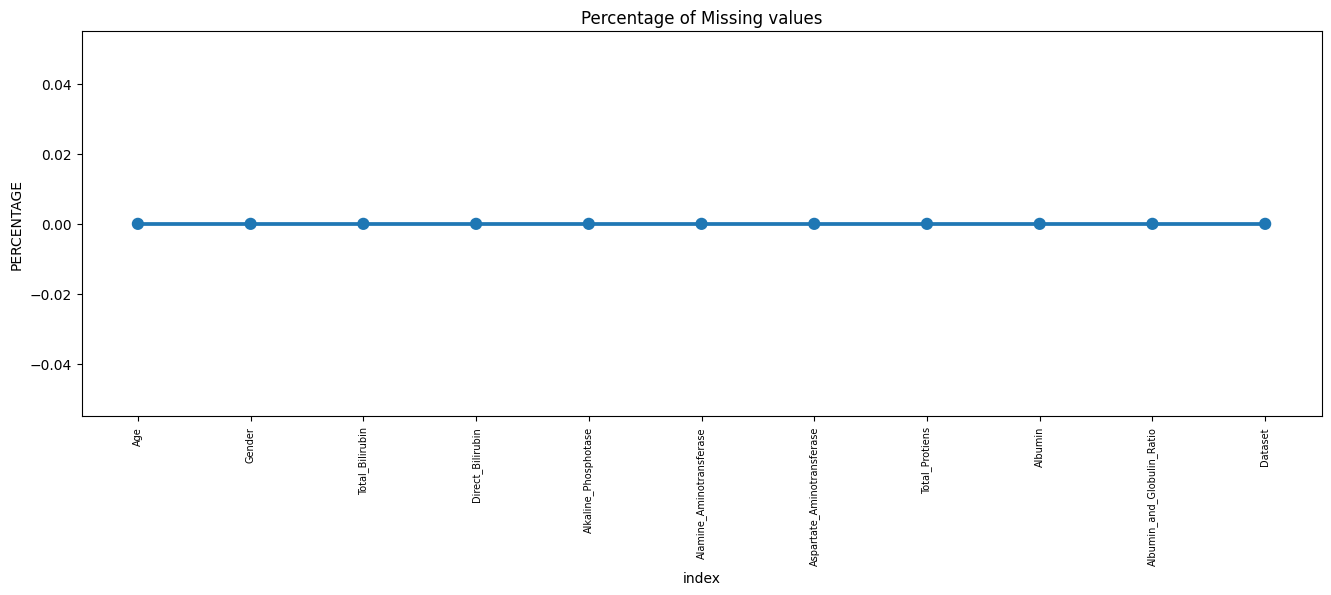

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df2.isnull().sum())*100/df2.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

<Axes: xlabel='Dataset', ylabel='count'>

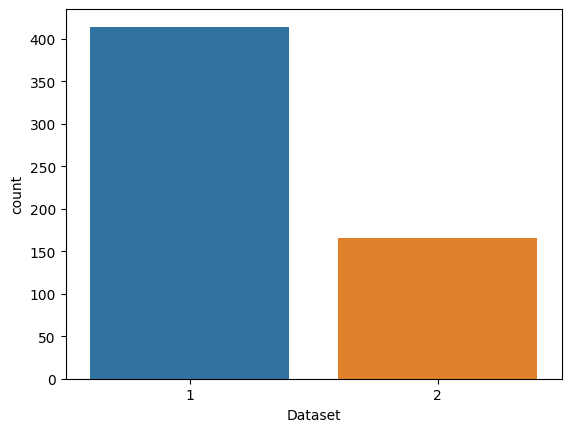

In [37]:
import seaborn as sns
sns.countplot(x='Dataset',data=df2)

In [38]:
df2.Dataset.value_counts()

Dataset
1    414
2    165
Name: count, dtype: int64

In [39]:
df2['Dataset'] = df2['Dataset'].replace({1: 0, 2: 1})

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
print(le)

LabelEncoder()


In [41]:
df2['Gender']=le.fit_transform(df2['Gender'])

In [42]:
df2.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [43]:
df2['Dataset'].value_counts()

Dataset
0    414
1    165
Name: count, dtype: int64

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Preprocess Data for Machine Learning Development
X = df2.drop(['Dataset'], axis = 1)
y = df2['Dataset']


over_strategy = {0 : 1000, 1 : 1000}
under_strategy = {0 : 1000, 1 : 1000}

oversample = SMOTE(sampling_strategy = over_strategy)
undersample = RandomUnderSampler(sampling_strategy = under_strategy)

X_final,y = oversample.fit_resample(X,y)
X_final,y = undersample.fit_resample(X_final, y)


X_train,X_test,y_train,y_test = train_test_split(X_final,y,random_state = 10, test_size = 0.2)

In [45]:
x=df2.drop('Dataset',axis=1)
x

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [46]:
y=df2['Dataset']
y

0      0
1      0
2      0
3      0
4      0
      ..
578    1
579    0
580    0
581    0
582    1
Name: Dataset, Length: 579, dtype: int64

In [47]:
X_train

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
408,65,1,4.900000,2.700000,190,33,71,7.100000,2.900000,0.700000
1386,48,1,4.530826,2.083422,583,23,42,6.027963,2.047870,0.517157
439,42,0,0.700000,0.200000,152,35,81,6.200000,3.200000,1.060000
56,33,1,0.800000,0.200000,198,26,23,8.000000,4.000000,1.000000
1768,49,0,0.714363,0.114363,149,14,12,5.572352,2.914901,1.028725
...,...,...,...,...,...,...,...,...,...,...
1598,69,0,0.700000,0.200000,183,18,24,7.104256,3.386810,0.882554
1675,47,0,1.958570,0.862405,408,47,52,6.140152,3.168797,0.833759
1003,51,0,2.222645,1.108071,361,49,25,5.744843,2.363228,0.660538
1172,52,1,3.190357,1.423826,555,22,39,5.985408,1.898929,0.468219


In [48]:
y_train

408     0
1386    1
439     0
56      1
1768    1
       ..
1598    1
1675    1
1003    0
1172    1
1830    1
Name: Dataset, Length: 1600, dtype: int64

In [49]:
X_test

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
1157,32,1,30.422789,17.055097,218,39,79,5.499452,2.696167,0.897810
1679,51,0,0.874685,0.200000,212,34,30,7.291186,3.545593,0.900000
1561,27,0,0.788529,0.200000,194,35,35,7.455736,3.821322,1.043940
809,49,1,0.990118,0.390118,159,31,26,6.963373,4.080235,1.353490
1837,52,1,2.339607,0.914284,154,38,103,4.974026,2.600000,1.062987
...,...,...,...,...,...,...,...,...,...,...
1055,74,1,7.970321,4.581396,385,29,24,5.502658,1.804430,0.481417
1177,37,1,0.800000,0.200000,195,27,21,7.022651,3.462458,0.951133
1848,64,1,0.909042,0.245389,145,18,27,5.754611,3.200000,1.256329
210,42,1,2.700000,1.300000,219,60,180,7.000000,3.200000,0.800000


In [50]:
y_test

1157    0
1679    1
1561    1
809     0
1837    1
       ..
1055    0
1177    1
1848    1
210     0
1375    1
Name: Dataset, Length: 400, dtype: int64

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier( max_depth = 5)
dts.fit(X_train,y_train)
y_pred=dts.predict(X_test)
acc_dt=accuracy_score(y_pred,y_test)
acc_dt

0.74

In [52]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       173
           1       0.82      0.70      0.75       227

    accuracy                           0.74       400
   macro avg       0.74      0.75      0.74       400
weighted avg       0.75      0.74      0.74       400



In [53]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
ads=AdaBoostClassifier(random_state=52,n_estimators = 50 )
ads.fit(X_train,y_train)
y_pred=ads.predict(X_test)
acc_ad=accuracy_score(y_pred,y_test)
acc_ad

0.7425

In [54]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.79      0.73       178
           1       0.81      0.71      0.75       222

    accuracy                           0.74       400
   macro avg       0.74      0.75      0.74       400
weighted avg       0.75      0.74      0.74       400



In [55]:
import xgboost as xgb
xgs = xgb.XGBClassifier()
xgs.fit(X_train, y_train)
y_pred = xgs.predict(X_test)
acc_xg = accuracy_score(y_pred, y_test)
acc_xg

0.8925

In [56]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       184
           1       0.94      0.85      0.90       216

    accuracy                           0.89       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.89      0.89       400



In [57]:
pip install dill


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [58]:
import pickle, dill
with open('XGBClassifier(liver).pkl','wb') as fp:
    dill.dump(xgs,fp)

In [59]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(iterations=50, random_seed=52)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
acc_catboost = accuracy_score(y_test, y_pred_catboost)
print("Accuracy with CatBoost:", acc_catboost)

Learning rate set to 0.196398
0:	learn: 0.6536488	total: 3.42ms	remaining: 167ms
1:	learn: 0.6236729	total: 6.95ms	remaining: 167ms
2:	learn: 0.5990543	total: 9.5ms	remaining: 149ms
3:	learn: 0.5776281	total: 14.3ms	remaining: 164ms
4:	learn: 0.5606545	total: 17.6ms	remaining: 158ms
5:	learn: 0.5476861	total: 22ms	remaining: 161ms
6:	learn: 0.5370826	total: 25.1ms	remaining: 154ms
7:	learn: 0.5232247	total: 29.3ms	remaining: 154ms
8:	learn: 0.5122673	total: 32.5ms	remaining: 148ms
9:	learn: 0.5034225	total: 34.9ms	remaining: 140ms
10:	learn: 0.4975586	total: 39.1ms	remaining: 139ms
11:	learn: 0.4883664	total: 41.1ms	remaining: 130ms
12:	learn: 0.4819104	total: 43.4ms	remaining: 123ms
13:	learn: 0.4756648	total: 46.2ms	remaining: 119ms
14:	learn: 0.4668835	total: 48.7ms	remaining: 114ms
15:	learn: 0.4596974	total: 51ms	remaining: 108ms
16:	learn: 0.4540422	total: 52.9ms	remaining: 103ms
17:	learn: 0.4499121	total: 55ms	remaining: 97.8ms
18:	learn: 0.4463240	total: 56.9ms	remaining: 92.8

In [60]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
base_classifiers = [
    ('adaboost', AdaBoostClassifier(random_state=52, n_estimators=50)),
    ('catboost', CatBoostClassifier(iterations=50, random_seed=52))
]
stacking_classifier = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=DecisionTreeClassifier(max_depth=5)
)
stacking_classifier.fit(X_train, y_train)
y_pred_stacking = stacking_classifier.predict(X_test)
acc_stacking = accuracy_score(y_test, y_pred_stacking)
print("Accuracy with Stacking Classifier:", acc_stacking)

Learning rate set to 0.196398
0:	learn: 0.6536488	total: 3.18ms	remaining: 156ms
1:	learn: 0.6236729	total: 6.94ms	remaining: 167ms
2:	learn: 0.5990543	total: 9.91ms	remaining: 155ms
3:	learn: 0.5776281	total: 13.1ms	remaining: 151ms
4:	learn: 0.5606545	total: 16ms	remaining: 144ms
5:	learn: 0.5476861	total: 19ms	remaining: 139ms
6:	learn: 0.5370826	total: 24.7ms	remaining: 152ms
7:	learn: 0.5232247	total: 27.5ms	remaining: 144ms
8:	learn: 0.5122673	total: 30.5ms	remaining: 139ms
9:	learn: 0.5034225	total: 33.5ms	remaining: 134ms
10:	learn: 0.4975586	total: 41.7ms	remaining: 148ms
11:	learn: 0.4883664	total: 46.2ms	remaining: 146ms
12:	learn: 0.4819104	total: 49.4ms	remaining: 140ms
13:	learn: 0.4756648	total: 54.1ms	remaining: 139ms
14:	learn: 0.4668835	total: 57.3ms	remaining: 134ms
15:	learn: 0.4596974	total: 60.4ms	remaining: 128ms
16:	learn: 0.4540422	total: 63.3ms	remaining: 123ms
17:	learn: 0.4499121	total: 66.2ms	remaining: 118ms
18:	learn: 0.4463240	total: 70.6ms	remaining: 11

In [61]:
with open("XGBClassifier(liver).pkl", 'rb') as fp:
    model1 = pickle.load(fp)

In [62]:
abc=[59,	1,	19.344371,	10.643388,	983,	48,	40,	6.931558,	3.331558,	0.900000]
result=model1.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Liver Disease')
else:
    print('The Person has Liver Disease')

The Person has No-Liver Disease


In [63]:
abc=[31,	0,	0.729486,	0.143162,	182,	37,	31,	7.072648,	4.358973,	1.572648]
result=model1.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Liver Disease')
else:
    print('The Person has Liver Disease')

The Person has Liver Disease


## Heart ##

In [64]:
df3=pd.read_csv('Heart_Disease_Prediction.csv')
df3.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [65]:
df3.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [66]:
df3.shape

(270, 14)

In [67]:
df3["Heart Disease"].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [68]:
df3.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [69]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [70]:
## we check the eachb values count
df3["Heart Disease"].value_counts().to_dict()

{'Absence': 150, 'Presence': 120}

In [71]:
df3["Heart Disease"].replace({'Absence': 0, 'Presence': 1},inplace=True)

In [72]:
df3.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [73]:
df3["Heart Disease"].value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

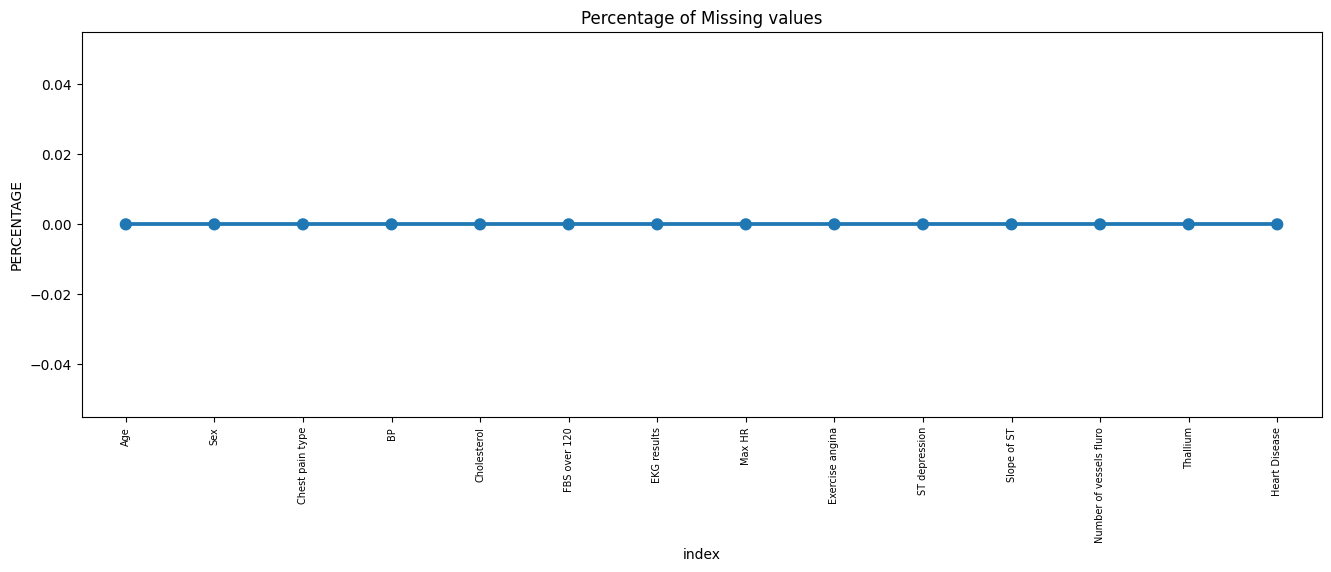

In [74]:
#plot the graph to check wether there are any missing value present
missing = pd.DataFrame((df3.isnull().sum())*100/df3.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [75]:
df3.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [76]:
### splitting the data

In [77]:
x = df3.drop("Heart Disease", axis=1)
y = df3["Heart Disease"]

In [78]:
x.head(2)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7


In [79]:
y.head(2)

0    1
1    0
Name: Heart Disease, dtype: int64

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [81]:
x_train

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
84,57,1,4,110,201,0,0,126,1,1.5,2,0,6
251,44,1,2,130,219,0,2,188,0,0.0,1,0,3
92,54,1,4,124,266,0,2,109,1,2.2,2,1,7
201,58,1,4,125,300,0,2,171,0,0.0,1,2,7
126,62,1,4,120,267,0,0,99,1,1.8,2,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,67,1,4,120,229,0,2,129,1,2.6,2,2,7
188,62,0,4,140,394,0,2,157,0,1.2,2,0,3
71,57,0,4,120,354,0,0,163,1,0.6,1,0,3
106,51,1,3,100,222,0,0,143,1,1.2,2,0,3


In [82]:
y_train

84     0
251    0
92     1
201    1
126    1
      ..
20     1
188    0
71     0
106    0
102    0
Name: Heart Disease, Length: 189, dtype: int64

In [83]:
x_test

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
30,57,1,3,128,229,0,2,150,0,0.4,2,1,7
116,46,1,4,120,249,0,2,144,0,0.8,1,0,7
79,56,1,2,120,236,0,0,178,0,0.8,1,0,3
127,52,0,3,136,196,0,2,169,0,0.1,2,0,3
196,58,0,4,100,248,0,2,122,0,1.0,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,41,0,2,105,198,0,0,168,0,0.0,1,1,3
97,58,1,4,100,234,0,0,156,0,0.1,1,1,7
200,68,1,3,118,277,0,0,151,0,1.0,1,1,7
38,42,1,3,130,180,0,0,150,0,0.0,1,0,3


In [84]:
y_test

30     1
116    1
79     0
127    0
196    0
      ..
55     0
97     1
200    0
38     0
154    0
Name: Heart Disease, Length: 81, dtype: int64

In [85]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(random_state = 100,splitter='random', max_depth = 5, min_samples_leaf = 5)
dts.fit(x_train,y_train)
y_pred=dts.predict(x_test)
acc_dt_hrt=accuracy_score(y_pred,y_test)
acc_dt_hrt

0.7283950617283951

In [86]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79        55
           1       0.56      0.69      0.62        26

    accuracy                           0.73        81
   macro avg       0.70      0.72      0.70        81
weighted avg       0.75      0.73      0.73        81



In [87]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
adb=AdaBoostClassifier(random_state=52,n_estimators = 50 )
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
acc_adb_hrt=accuracy_score(y_pred,y_test)
acc_adb_hrt

0.7777777777777778

In [88]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        57
           1       0.59      0.79      0.68        24

    accuracy                           0.78        81
   macro avg       0.75      0.78      0.75        81
weighted avg       0.81      0.78      0.79        81



In [89]:
import xgboost as xgb
xgs = xgb.XGBClassifier()
xgs.fit(x_train,y_train)
y_pred=xgs.predict(x_test)
acc_xgb_hrt=accuracy_score(y_pred,y_test)
acc_xgb_hrt

0.7777777777777778

In [90]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        57
           1       0.59      0.79      0.68        24

    accuracy                           0.78        81
   macro avg       0.75      0.78      0.75        81
weighted avg       0.81      0.78      0.79        81



In [91]:
from sklearn.metrics import classification_report
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        57
           1       0.59      0.79      0.68        24

    accuracy                           0.78        81
   macro avg       0.75      0.78      0.75        81
weighted avg       0.81      0.78      0.79        81



In [92]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
catboost_model = CatBoostClassifier(
    random_seed=100,
    iterations=500,  # You can adjust the number of iterations
    depth=5,
    min_child_samples=5,
    verbose=0  # Set verbose to 0 for less output during training
)
catboost_model.fit(x_train, y_train)
y_pred_catboost = catboost_model.predict(x_test)
acc_cat_hrt = accuracy_score(y_test, y_pred_catboost)
print("Accuracy with CatBoost:", acc_cat_hrt)

Accuracy with CatBoost: 0.8395061728395061


In [93]:
import pickle
with open("CatBoostClassifier(herat).pkl", 'wb') as fp:
    pickle.dump(catboost_model, fp)

In [94]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
base_classifiers = [
    ('xgboost', xgb.XGBClassifier()),
    ('catboost', CatBoostClassifier(
        random_seed=100,
        iterations=500,
        depth=5,
        min_child_samples=5,
        verbose=0
    ))
]
meta_classifier = xgb.XGBClassifier()
stacking_classifier = StackingClassifier( estimators=base_classifiers,final_estimator=meta_classifier )
stacking_classifier.fit(x_train, y_train)
y_pred_stacking = stacking_classifier.predict(x_test)
acc_stc_hrt = accuracy_score(y_test, y_pred_stacking)
print("Accuracy with Stacking Classifier:", acc_stc_hrt)

Accuracy with Stacking Classifier: 0.7654320987654321


In [95]:
with open("CatBoostClassifier(herat).pkl", 'rb') as fp:
    model2 = pickle.load(fp)

In [96]:
abc = [ 57, 1, 3, 128, 229, 0, 2, 150, 0, 0.4, 2, 1, 7 ]
result=model2.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Heart Disease')
else:
    print('The Person has Heart Disease')

The Person has Heart Disease


In [97]:
abc=[56, 1, 2, 120, 236, 0, 0, 178, 0, 0.8, 1, 0, 3]
result=model2.predict([abc])
result=result[0]
if result==0:
    print('The Person has No-Heart Disease')
else:
    print('The Person has Heart Disease')

The Person has No-Heart Disease


In [98]:
# Graph For Heart

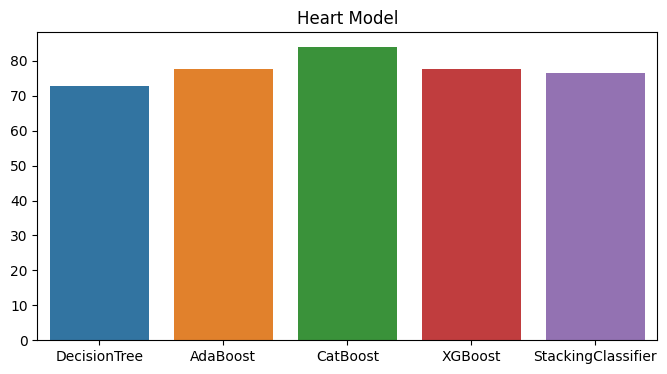

In [99]:
Algorithums = ["DecisionTree","AdaBoost","CatBoost","XGBoost","StackingClassifier"]
Accuracy = [acc_dt_hrt*100, acc_adb_hrt*100, acc_cat_hrt*100, acc_xgb_hrt*100, acc_stc_hrt*100]

plt.figure(figsize=(8,4))
sns.barplot(x = Algorithums, y = Accuracy)
plt.title("Heart Model")
plt.savefig("m8")
plt.show()